# Exploratory Data Analysis (EDA) - Customer Personality Analysis
by : Jeffrey Junior T

# Latar Belakang

Electronic commerce (e-commerce) mengacu pada perusahaan dan individu yang melakukan transaksi jual beli barang atau jasa melalui Internet.

Source :
https://www.investopedia.com/terms/e/ecommerce.asp

Segmentasi adalah membagi pelanggan ke dalam berbagai cara, seperti berdasarkan demografi, perilaku, gaya hidup, dan lain-lain.
Manfaat segmentasi pelanggan dalam pemasaran adalah kita dapat menargetkan orang yang tepat dengan pesan yang tepat tentang produk Anda. Hal ini akan meningkatkan keberhasilan kampanye pemasaran.

Source :
https://www.emerald.com/insight/content/doi/10.1108/SJME-06-2019-0036/full/pdf


# Define Problem

Menambah customer dengan melakukan segmentasi berdasarkan perilaku

# Business Goals

Melakukan segmentasi customer agar pemasaran tepat sasaran

# Data Collection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [3]:
df = pd.read_excel('marketing_campaign.xlsx')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Understanding

## People

- ID: Identitas unik Customer
- Year_Birth: Tahun Lahir Customer
- Education: Tingkat pendidikan Customer
- Marital_Status: Status pernikahan customer
- Income: Pendapatan rumah tangga tahunan customer
- Kidhome: Jumlah anak dalam rumah tangga customer
- Teenhome: Jumlah remaja dalam rumah tangga customer
- Dt_Customer: Tanggal pelanggan berlangganan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir customer
- Complain: 1 jika customer mengeluh dalam 2 tahun terakhir, 0 sebaliknya

## Products

- MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir
- MntFruits: Jumlah uang yang dihabiskan untuk buah dalam 2 tahun terakhir
- MntMeatProducts: Jumlah uang yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah uang yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah uang yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir

## Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 jika customer menerima penawaran pada promosi ke-1, 0 sebaliknya
- AcceptedCmp2: 1 jika customer menerima penawaran pada promosi ke-2, 0 sebaliknya
- AcceptedCmp3: 1 jika customer menerima penawaran pada promosi ke-3, 0 sebaliknya
- AcceptedCmp4: 1 jika customer menerima penawaran pada promosi ke-4, 0 sebaliknya
- AcceptedCmp5: 1 jika customer menerima penawaran pada promosi ke-5, 0 sebaliknya
- Response: 1 jika pelanggan menerima penawaran pada promosi terakhir, 0 sebaliknya

## Place

- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases:Jumlah pembelian yang dilakukan melalui katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

# Data Wrangling

##### 1. Cek Tipe Data

In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# Konversi tipe data datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

#### 2. Cek Missing Value

In [7]:
df.isna().sum()

# Terdapat missing value pada kolom Income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df = df.dropna(subset=['Income'])

# Karena jumlah yang sedikit maka missing value di drop

In [9]:
# Cek missing value pada marital status
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [10]:
# Cek missing value pada Education
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

##### 3. Cek Outliers

<AxesSubplot:xlabel='Income'>

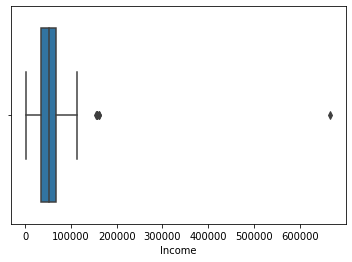

In [11]:
# Terdapat Outlier
sns.boxplot(x=df["Income"])

In [12]:
# Membuat fungsi untuk drop outlier
def cek_outliers(col):
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5 * IQR)
    lower_fence = Q1 - (1.5 * IQR)
    return upper_fence, lower_fence
    

In [13]:
upper_fence, lower_fence = cek_outliers('Income')

In [14]:
# Melakukan drop outlier Income
df = df.drop(df[(df['Income']>upper_fence)].index)

<AxesSubplot:xlabel='Year_Birth'>

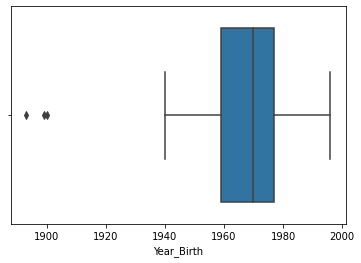

In [15]:
# Terdapat outlier pada kolom Year_Birth
sns.boxplot(x=df["Year_Birth"])

In [16]:
upper_fence, lower_fence = cek_outliers('Year_Birth')

In [17]:
# Melakukan drop outlier pada kolom Year_Birth
df = df.drop(df[(df['Year_Birth']< lower_fence)].index)

#### 4. Cek Data Duplikat

In [18]:
# Cek Data Duplikat, tidak terdapat data duplikat
df[df['ID'].duplicated()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### 5. Pengolahan Kolom

In [19]:
# Membuat kolom umur 
df['Age']=2014 - df['Year_Birth']

In [20]:
# Membuat fungsi untuk Recategorize umur
# Source : https://med.libretexts.org/Courses/American_Public_University/APUS%3A_An_Introduction_to_Nutrition_(Byerley)/APUS%3A_An_Introduction_to_Nutrition_1st_Edition/12%3A_Maternal_Infant_Childhood_and_Adolescent_Nutrition/12.02%3A_The_Human_Life_Cycle
def func_age(x):
    if x >=18 and x <= 30 :
        return 'Adult (18-30)'
    elif x >= 31 and x <= 50 :
        return 'Middle Age (31-50)'
    elif x >= 51 and x <= df['Age'].describe()['max'] :
        return 'Senior (51-74)'

In [21]:
# Hasil recategorize umur disimpan pada kolom Customer Age
df['CustomerAge'] = df['Age'].apply(func_age)

In [22]:
# Melakukan Recategorize Marital Status
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone',
'Single':'Alone',
'Married':'Couple',
'Together':'Couple',
'Absurd':'Alone',
'Widow':'Alone',
'YOLO':'Alone'})

In [23]:
# Membuat fungsi untuk Recategorize amount wines
def func_MntWines(x):
    if  x <= df["MntWines"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntWines"].describe()['50%'] :
        return 'Higher Spent'
    

In [24]:
# Hasil recategorize Amount Wines disimpan pada kolom WinesSpent
df['WinesSpent'] = df['MntWines'].apply(func_MntWines)

In [25]:
# Membuat fungsi untuk Recategorize amount sweet
def func_MntSweet(x):
    if  x <= df["MntSweetProducts"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntSweetProducts"].describe()['50%'] :
        return 'Higher Spent'
    

In [26]:
# Hasil recategorize Amount Sweet disimpan pada kolom SweetSpent
df['SweetSpent'] = df['MntSweetProducts'].apply(func_MntSweet)

In [27]:
# Membuat fungsi untuk Recategorize amount meat
def func_MntMeat(x):
    if  x <= df["MntMeatProducts"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntMeatProducts"].describe()['50%'] :
        return 'Higher Spent'

In [28]:
# Hasil recategorize Amount Meat disimpan pada kolom MeatSpent
df['MeatSpent'] = df['MntMeatProducts'].apply(func_MntMeat)

In [29]:
# Membuat fungsi untuk Recategorize amount meat
def func_MntGold(x):
    if  x <= df["MntGoldProds"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntGoldProds"].describe()['50%'] :
        return 'Higher Spent'

In [30]:
# Hasil recategorize Amount Gold disimpan pada kolom GoldSpent
df['GoldSpent'] = df['MntGoldProds'].apply(func_MntGold)

In [31]:
# Membuat fungsi untuk Recategorize amount fruit
def func_MntFruit(x):
    if  x <= df["MntFruits"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntFruits"].describe()['50%'] :
        return 'Higher Spent'

In [32]:
# Hasil recategorize Amount Fruit disimpan pada kolom FruitSpent
df['FruitSpent'] = df['MntFruits'].apply(func_MntFruit)

In [33]:
# Membuat fungsi untuk Recategorize amount fish
def func_MntFish(x):
    if  x <= df["MntFishProducts"].describe()['50%'] :
        return 'Lower Spent'
    elif x > df["MntFishProducts"].describe()['50%'] :
        return 'Higher Spent'

In [34]:
# Hasil recategorize Amount Fish disimpan pada kolom FishSpent
df['FishSpent'] = df['MntFishProducts'].apply(func_MntFish)

In [35]:
# Drop Kolom yang tidak digunakan dalam analysis
df = df.drop(columns=['Income','Kidhome','Teenhome','Recency','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue'])

# Business Question

#### 1. Bagaimana pengaruh kelompok umur terhadap customer dalam berbelanja melalui web? 

In [36]:
df_visitWeb = pd.crosstab(index=df['CustomerAge'],columns='SumVisitWeb',values=df['NumWebVisitsMonth'],aggfunc='sum')

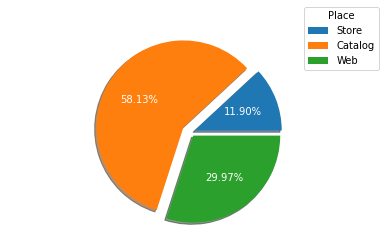

In [40]:
df_visitWeb.plot.pie(subplots=True,
shadow=True,
textprops={
    'size' : 10,
    'color' : 'White'
},
autopct = '%1.2f%%',
explode=(0.05, 0.1, 0.05),
radius = 1,
)
title = plt.title('Visit Web Precentage')
plt.setp(title, color='w')
plt.ylabel('')
plt.legend(['Store','Catalog','Web'],title='Place', bbox_to_anchor=(1, 1.1))
plt.show()

In [42]:
df_ct1 = pd.crosstab(index=df['CustomerAge'],columns='SumStorePurchase',values=df['NumStorePurchases'],aggfunc='sum')

In [43]:
df_ct2 = pd.crosstab(index=df['CustomerAge'],columns='SumCatalogPurchase',values=df['NumCatalogPurchases'],aggfunc='sum')

In [44]:
df_ct3 = pd.crosstab(index=df['CustomerAge'],columns='SumWebPurchase',values=df['NumWebPurchases'],aggfunc='sum')

In [45]:
df_final = df_ct1.join(df_ct2, on='CustomerAge').join(df_ct3,on='CustomerAge').T

In [46]:
df_ct_adult = df_final.drop(['Middle Age (31-50)','Senior (51-74)'],axis = 1)

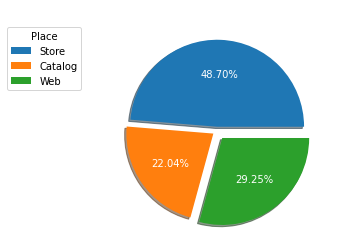

In [48]:
df_ct_adult.plot.pie(subplots=True,
shadow=True,
textprops={
    
    'size' : 10,
    'color' : 'white',
    
},
autopct = '%1.2f%%',
explode=(0.05, 0.05, 0.1),
radius = 1,
labels =( 'Store Purchase','Catalog Purchase','Web Purchase')
)

title = plt.title('Adult (18-30)')
plt.setp(title, color='w')
plt.ylabel('')
plt.legend(['Store','Catalog','Web'],title='Place', bbox_to_anchor=(-0.1, 1))
plt.show()

In [50]:
df_ct_middle = df_final.drop(['Adult (18-30)','Senior (51-74)'],axis = 1)

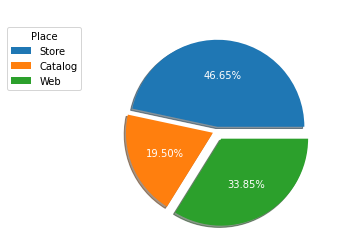

In [52]:
df_ct_middle.plot.pie(subplots=True,
shadow=True,
textprops={
    'size' : 10,
    'color' : 'white'
},
autopct = '%1.2f%%',
explode=(0.05, 0.05, 0.1),
radius = 1,
labels =( 'Store Purchase','Catalog Purchase','Web Purchase')
)
title = plt.title('Middle (31-50)')
plt.setp(title, color='w')
plt.ylabel('')
plt.legend(['Store','Catalog','Web'],title='Place', bbox_to_anchor=(-0.1, 1))
plt.show()

In [54]:
df_ct_senior = df_final.drop(['Adult (18-30)','Middle Age (31-50)'],axis = 1)

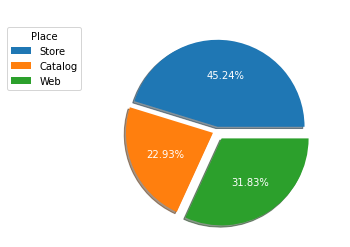

In [56]:
df_ct_senior.plot.pie(subplots=True,
shadow=True,
textprops={
    'size' : 10,
    'color' : 'white'
},
autopct = '%1.2f%%',
explode=(0.05, 0.05, 0.1),
radius = 1,
labels =( 'Store Purchase','Catalog Purchase','Web Purchase')
)
title = plt.title('Senior (51-74)')
plt.setp(title, color='w')
plt.ylabel('')
plt.legend(['Store','Catalog','Web'],title='Place', bbox_to_anchor=(-0.1, 1))
plt.show()

Insight :

Customer yang belanja secara online lebih loyal dibandingkan yang langusng belanja di toko karena pengaksesannya yang mudah sehingga lebih menghemat waktu dalam berbelanja

Source :
https://www.candyindustry.com/articles/90056-online-grocery-shoppers-more-loyal-to-brands-stores-than-in-store-shoppers

Dapat dilihat pada pie chart visit web total bahwa Customer middle age merupakan pengunjung web terbanyak yaitu sebanyak 58.13% dari total customer.
Dari tempat pembelian item berdasarkan kategori umur juga, Middle age merupakan pembeli melalui web terbanyak yaitu sebesar 33.85%. Sehingga customer Middle age merupakan customer yang paling potensial dalam pembelian item melalui web.


Recomendation :

Tim marketing dapat memberikan promo dalam pembelian item terhadap pengguna baru aplikasi, campaign tersebut dapat disebarkan melalui ads sosial media dengan target umur middle age yaitu 31-50 tahun.

Salah satunya adalah melalui ads instagram, tim marketing dapat mengadakan giveaway untuk mendapatkan lebih banyak customer. Dikutip dari jmango360.com akun instagram yang melakukan giveaway cenderung mengalami pertumbuhan follower 70% lebih cepat dalam 3 bulan.

Source :
https://jmango360.com/blog/11-app-marketing-ideas-ecommerce-stores/



#### 2. Item wines cocok untuk customer yang seperti apa? 

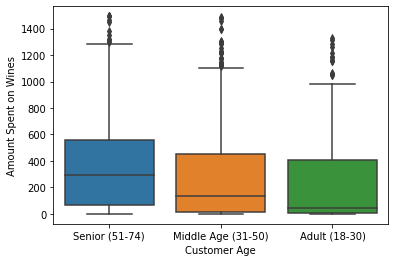

In [ ]:
# Dapat dilihat bahwa boxplot TIDAK terdistribusi normal 
sns.boxplot(x=df['CustomerAge'],y=df['MntWines'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Wines')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntWines'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntWines'],
    df[df['CustomerAge']=='Senior (51-74)']['MntWines']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada wines berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['WinesSpent'], normalize='index', margins=True)*100).round(2)

WinesSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),35.41,64.59
Middle Age (31-50),45.40,54.60
Senior (51-74),62.60,37.40
All,49.93,50.07


Insight :

Dapat dilihat dari kelompok umur bahwa senior age memiliki potensi karena 62% memiliki higher spent pada pembelian wines.

Recomendation :

Faktanya wine memiliki khasiat untuk senior age, dikutip dari thesummitretirement.com beberapa khasiat wine yaitu adalah menurunkan risiko penyakit alzheimer, mengurangi peluang terkena kanker,dan mengurangi peradangan dalam tubuh dengan kadar secukupnya yaitu 2 gelas sehari.

Source :
https://www.thesummitretirement.com/senior-retirement-blog/what-are-the-benefits-of-drinking-red-wine-for-seniors/

Sehingga tim marketing dapat membuat campaign berisi khasiat dari wines untuk senior age dan dapat dipasarkan di panti jompo, seperti sage home care yang membolehkan penghuni untuk meminum wine dengan kadar yang cukup dan merupakan jenis wine yang aman dikonsumsi untuk usia senja seperti Pinot Noir, Rose, Merlot, atau Malbec yang dapat dibeli di toko ini.

Source :
https://www.sagehomecare.com/a-senior-adults-cheatsheet-for-healthy-wines

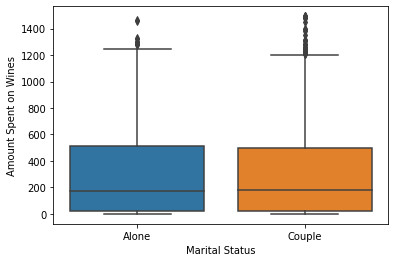

In [ ]:
# Dapat dilihat bahwa boxplot TIDAK terdistribusi normal 
sns.boxplot(x=df['Marital_Status'],y=df["MntWines"])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Wines')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntWines'],
    df[df['Marital_Status']=='Couple']['MntWines']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.005 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item wines sehingga tidak perlu dianalisis lebih dalam

Terima H0


#### 3. Item permen cocok untuk customer yang seperti apa? 

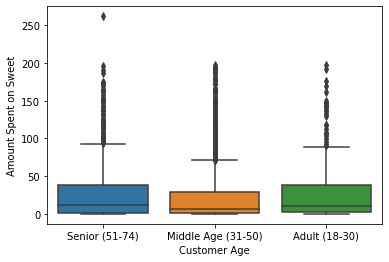

In [ ]:
# Data TIDAK terdistribusi normal
sns.boxplot(x=df['CustomerAge'],y=df['MntSweetProducts'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Sweet')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntSweetProducts'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntSweetProducts'],
    df[df['CustomerAge']=='Senior (51-74)']['MntSweetProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada permen berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['SweetSpent'], normalize='index', margins=True)*100).round(2)

SweetSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),54.47,45.53
Middle Age (31-50),45.57,54.43
Senior (51-74),54.93,45.07
All,49.71,50.29


Insight :

Dapat dilihat dari kelompok umur bahwa adult dan senior age memiliki potensi karena  memiliki higher spent yang besar pada pembelian permen.

Dikutip dari comfortkeepers.com, banyak nya orang lanjut usia dalam mengonsumsi permen karena semakin bertambahnya usia maka indra pengecap akan semakin berkurang, hal ini yang memicu customer Senior memakan makanan yang terasa lebih manis atau asin.

Source : 
https://www.comfortkeepers.com/articles/info-center/seniors-and-nutrition/controlling-sweet-and-salty-cravings-in-seniors

Recomendation :

Menurut penelitan oleh Elżbieta Bojanowska di University in Warsaw, aktivitas customer Senior banyak dihabiskan dalam kegiatan keagamaan, bersama keluarga, dan aktivitas sosial/komunitas.

Source :
http://www.repozytorium.uni.wroc.pl/Content/58907/PDF/16_Elzbieta_Bojanowska.pdf

Sehingga tim marketing dapat memasarkan produk permen yang rendah kalori yang tersedia di toko ini pada kegiatan sosial yang banyak melibatkan orang dengan usia senja (senior age), salah satu contoh nya adalah kegiatan sosial Alzheimer's Society - Memory Walk di UK yang bertujuan untuk menggalang dana untuk dementia research.

Source :
https://tfn.scot/lists/the-UKs-25-biggest-fundraising-events

Tim marketing juga dapat memasarkan produk melalui ads social media dengan kategori umur adult, hal itu dapat dilakukan karena menurut penelitian yang dilakukan oleh Kevin Norton di University of South Australia, orang dewasa(Adult) menghabiskan 39% kegiatan sehari harinya dengan duduk dan menonton.

Source :
https://www.researchgate.net/figure/The-typical-adult-pattern-of-daily-activities-percentage-of-a-24-h-day-when-categorised_fig1_40683002



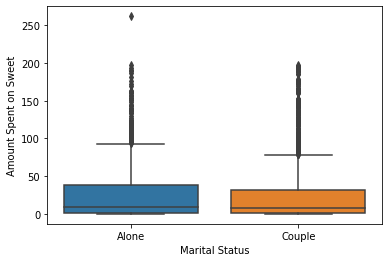

In [ ]:
sns.boxplot(x=df['Marital_Status'],y=df['MntSweetProducts'])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Sweet')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntSweetProducts'],
    df[df['Marital_Status']=='Couple']['MntSweetProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.05 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item permen sehingga tidak perlu dianalisis lebih dalam

Terima H0


#### 4. Item daging cocok untuk customer yang seperti apa? 

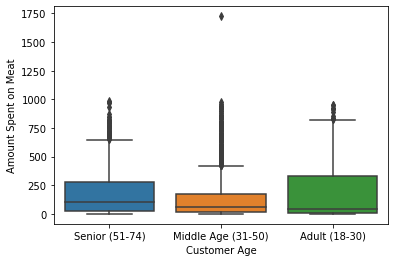

In [ ]:
# Data TIDAK terdistribusi normal
sns.boxplot(x=df['CustomerAge'],y=df['MntMeatProducts'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Meat')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntMeatProducts'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntMeatProducts'],
    df[df['CustomerAge']=='Senior (51-74)']['MntMeatProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada daging berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['MeatSpent'], normalize='index', margins=True)*100).round(2)

MeatSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),43.19,56.81
Middle Age (31-50),45.57,54.43
Senior (51-74),58.77,41.23
All,49.66,50.34


Insight :

Dapat dilihat dari kelompok umur bahwa senior age memiliki potensi karena  memiliki higher spent yang besar pada pembelian daging

Recomendation:

Dikutip dari foodmanufacture.co.uk di toko-toko negara eropa sudah banyak menjual daging halal, sehingga tim marketing dapat memasarkan produk daging halal seperti daging sapi, kambing, atau domba di daerah yang banyak penduduk muslim jika toko terletak di negara barat atau eropa. 
Hal ini dikarenakan menurut penelitian yang dilakukan oleh Luis Guerrero di IRTA Monells, produksi daging sapi di negara maju jauh lebih rendah dibandingkan negara berkembang yang menyebabkan tingginya demand warga muslim terhadap daging halal. sehingga tim marketing dapat memberikan brosur terkait penjualan daging halal pada Customer terutama yang termasuk kategori umur senior age.

Source :
https://www.foodmanufacture.co.uk/Article/2016/06/17/Halal-range-launches-with-16-lines-on-Amazon-Fresh#:~:text=Meanwhile%2C%20the%20halal%20brand%2C%20whose,range%20lamb%20and%20beef%20cuts.

Font-i-Furnols, M. and Guerrero, L., 2014. Consumer preference, behavior and perception about meat and meat products: An overview. Meat science, 98(3), pp.361-371.

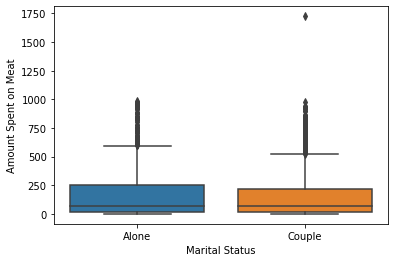

In [ ]:
sns.boxplot(x=df['Marital_Status'],y=df['MntMeatProducts'])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Meat')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntMeatProducts'],
    df[df['Marital_Status']=='Couple']['MntMeatProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.05 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item daging sehingga tidak perlu dianalisis lebih dalam

Terima H0


#### 5. Item emas cocok untuk customer yang seperti apa? 

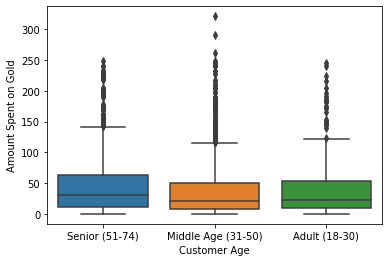

In [ ]:
# Dapat dilihat bahwa boxplot TIDAK terdistribusi normal 
sns.boxplot(x=df['CustomerAge'],y=df['MntGoldProds'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Gold')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntGoldProds'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntGoldProds'],
    df[df['CustomerAge']=='Senior (51-74)']['MntGoldProds']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada emas berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['GoldSpent'], normalize='index', margins=True)*100).round(2)


GoldSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),47.86,52.14
Middle Age (31-50),45.89,54.11
Senior (51-74),56.03,43.97
All,49.48,50.52


Insight :

Dapat dilihat dari kelompok umur bahwa senior age memiliki potensi karena  memiliki higher spent yang besar pada pembelian emas.

Banyak nya pembeli emas pada senior age dapat dikarenakan emas merupakan investasi yang paling aman di berbagai kondisi krisis ekonomi seperti yang terjadi pada tahun 1998 dan tahun 2008.

Source:
https://www.cnbc.com/id/38961269

Recomendation :

Tim marketing dapat memberikan campaign bahwa emas yang dibeli melalui toko ini nantinya dapat juga digunakan untuk pembelian produk lain yang tersedia di toko ini, sehingga dapat menaikkan minat customer untuk membeli emas dan pembelian jenis produk lainnya di toko ini. 
Tim marketing juga dapat memberikan semacam undian, dimana pada pembelian item tertentu dengan minimal belanja, pembeli dapat memiliki kesempatan mendapatkan hadiah emas. Sehingga cara ini dapat membuat customer sering melakukan pengecekan item mana yang berhadiah emas.
Seperti pada analisis sebelumnya karena wine dan daging banyak disukai oleh customer senior age maka tim marketing dapat memberikan campaign undian pada item tersebut.

Source : 
https://hypeinsight.com/leveraging-gold-as-an-investment-in-your-marketing-campaigns/


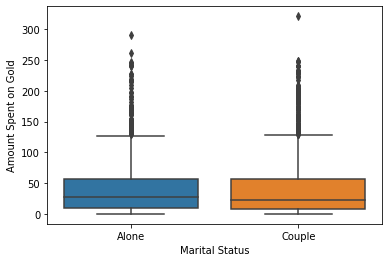

In [ ]:
# Dapat dilihat bahwa boxplot TIDAK terdistribusi normal 
sns.boxplot(x=df['Marital_Status'],y=df["MntGoldProds"])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Gold')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntGoldProds'],
    df[df['Marital_Status']=='Couple']['MntGoldProds']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.005 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item emas sehingga tidak perlu dianalisis lebih dalam

Terima H0


#### 6. Item buah cocok untuk customer yang seperti apa?

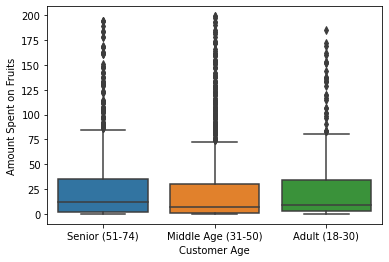

In [ ]:
# Data TIDAK terdistribusi normal
sns.boxplot(x=df['CustomerAge'],y=df['MntFruits'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Fruits')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntFruits'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntFruits'],
    df[df['CustomerAge']=='Senior (51-74)']['MntFruits']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada buah berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['FruitSpent'], normalize='index', margins=True)*100).round(2)

FruitSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),50.19,49.81
Middle Age (31-50),44.66,55.34
Senior (51-74),56.44,43.56
All,49.21,50.79


Insight :

Dapat dilihat dari kelompok umur bahwa senior age memiliki potensi karena  memiliki higher spent yang besar pada pembelian item jenis buah.

Banyaknya customer senior membeli buah karena dikutip dari nidirect.gov.uk bahwa semakin bertambahnya usia maka metabolisme makin berkurang sehingga dianjurkan untuk memakan makanan yang rendah kalori dan tinggi nutrisi seperti buah.

Source :
https://www.nidirect.gov.uk/articles/healthy-eating-older-adults#:~:text=Eating%20five%20or%20more%20portions,and%20are%20low%20in%20fat.

Recomendation :

Tim marketing dapat menampilkan detail dari kandungan kalori dan nutrisi serta manfaat dari buah tersebut. Detail terkait buah dapat ditaruh di samping buah.

Kurangnya pengetahuan dalam mengolah buah untuk dimasak dapat dimanfaatkan tim marketing dengan membuat kelas memasak saat weekdays bagi customer senior age seperti membuat salad atau jus. Hal ini dikarenakan senior age banyak menghabiskan waktu bersama keluarga sehingga pengetahuan memasak dapat diimplementasikan saat berkumpul bersama keluarga.

Tim marketing juga mempromosikan bahwa buah segar yang digunakan pada kelas memasak tersedia di toko ini.

Source :
https://smallbusiness.chron.com/benefits-driedfish-retailing-16080.html


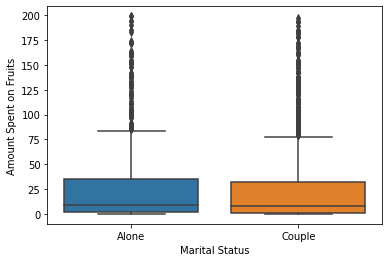

In [ ]:
sns.boxplot(x=df['Marital_Status'],y=df['MntFruits'])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Fruits')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntFruits'],
    df[df['Marital_Status']=='Couple']['MntFruits']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.05 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item buah sehingga tidak perlu dianalisis lebih dalam

Terima H0


#### 7. Item ikan cocok untuk customer yang seperti apa?

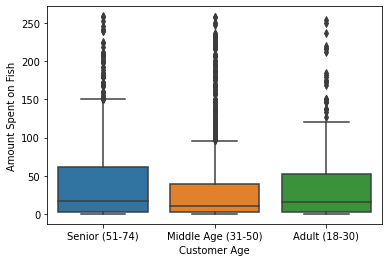

In [ ]:
# Data TIDAK terdistribusi normal
sns.boxplot(x=df['CustomerAge'],y=df['MntFishProducts'])
plt.xlabel('Customer Age')
plt.ylabel('Amount Spent on Fish')
plt.show()

In [ ]:
# Menggunakan Kruska Wallis karena data tidak terdistribusi normal dan lebih dari 2 grup
fval, pval = kruskal(
    df[df['CustomerAge']=='Adult (18-30)']['MntFishProducts'],
    df[df['CustomerAge']=='Middle Age (31-50)']['MntFishProducts'],
    df[df['CustomerAge']=='Senior (51-74)']['MntFishProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Secara statistik terdapat perbedaan yang signifikan dari spent pada ikan berdasarkan kelompok usia sehingga perlu dianalisa lebih dalam

Tolak H0


In [ ]:
(pd.crosstab(index=df['CustomerAge'], columns=df['FishSpent'], normalize='index', margins=True)*100).round(2)

FishSpent,Higher Spent,Lower Spent
CustomerAge,,
Adult (18-30),51.75,48.25
Middle Age (31-50),44.83,55.17
Senior (51-74),55.75,44.25
All,49.25,50.75


Insight :

Dapat dilihat dari kelompok umur bahwa adult dan senior age memiliki potensi karena  memiliki higher spent yang besar pada pembelian item jenis ikan.

Dikutip dari maplewoodseniorlivin.com banyaknya orang di usia senja mengonsumsi ikan dikarenakan banyaknya terkandung asam lemak omega 3 yang berkhasiat untuk mengurangi peradangan sendi, mengurangi risiko depresi, ADHD, serta diabetes.

Source :
https://www.maplewoodseniorliving.com/blog/how-eating-fish-keeps-seniors-healthy-maplewood/#:~:text=Fish%20Help%20You%20Have%20a%20Healthy%20Heart&text=These%20omega%2D3%20fatty%20acids,types%20of%20dementia%2C%20and%20diabetes.

Recomendation :

Tim marketing dapat mengadakan festival seafood seperti THE DORSET SEAFOOD FESTIVAL di UK dengan mengundang chef terkenal untuk merepresentasikan masakan berbahan ikan, acara musik, dan tempat bersantai yang nyaman sebagai daya tarik pengunjung. Pada festival tersebut, tim marketing dapat menyampaikan bahwa Ikan segar yang digunakan tersedia di toko ini.

Source :
https://www.dorsetseafood.co.uk/News/82/SEAFEAST_%E2%80%93_The_Dorset_Seafood_Festival/


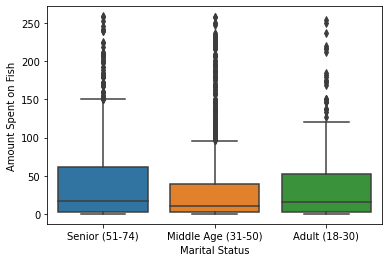

In [ ]:
sns.boxplot(x=df['CustomerAge'],y=df['MntFishProducts'])
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Fish')
plt.show()

In [ ]:
fval, pval = mannwhitneyu(
    df[df['Marital_Status']=='Alone']['MntFishProducts'],
    df[df['Marital_Status']=='Couple']['MntFishProducts']
    )

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# Karena Pvalue < 0.05 sehingga tidak ada perbedaan signifikan marital status terhadap spent pada item ikan sehingga tidak perlu dianalisis lebih dalam

Terima H0


In [ ]:
# Menyimpan file untuk diolah pada tableau
df.to_excel("marketing_campaign_updated.xlsx")